### Master of Applied Artificial Intelligence

**Course: TC5035 - Cuadro Inteligente**

<img src="../assets/logo.png" alt="Image Alt Text" width="500"/>


**Exploratory Data Analysis**

Tutor: Dr. Horario Martinez Alfaro


Team members:
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394


¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
¿Cuáles son las estadísticas resumidas del conjunto de datos?
¿Hay valores atípicos en el conjunto de datos?
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
¿Hay correlación entre las variables dependientes e independientes?
¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)


# 1. Import dependencies

In [135]:
import sys
sys.path.append('../')

In [164]:
import importlib, scripts.plotting_helpers as ph
importlib.reload(ph)
from scripts.helpers import download_data
from scripts.plotting_helpers import plot_histogram, plot_target, plot_bar, plot_bivariade_bar, explain_targetWith_cat, plot_correlation, plotBoxplots, correlation_barplot
import pandas as pd
import numpy as np

# 2. EDA



## 2.1 Data Description


* **Location and demographics**

  * **state_name** *(str)*: Customer’s department/state (e.g., GUATEMALA, JALAPA).
  * **state_city_equals** *(binary 0/1)*: Department and city match (address quality).
  * **client_gender** *(str: M/F/na)*: Declared gender.
  * **client_age** *(num)*: Age in years.


* **Previous telemarketing history/classification**

  * **previous_classification** *(str)*: Outcome of the prior outreach (NEW CLIENT, NOT INTERESTED, NOT EFFECTIVE, etc.).
  * **previous_calls** *(int)*: Number of previous calls.
  * **previous_not_effective_count** *(int)*: Prior “not effective” calls.
  * **previous_not_interested_count** *(int)*: Times the customer stated not interested.

* **Identification and seniority in the network**

  * **client_has_nit** *(binary)*: Has tax ID (1) or not (0).
  * **network_age_years** *(num)*: Tenure on the network (years).
  * **start_using_months** *(int)*: Months since first line usage.
  * **imei_first_use_months** *(int)*: Months since the IMEI first appeared on the network.
  * **imei_distinct_users** *(int)*: Number of distinct users for that IMEI.

* **Product portfolio (RGUs) and plan**

  * **rgus_prepaid / rgus_postpaid / rgus_home** *(int)*: Active products by type.
  * **plan_postpaid** *(binary)*: Has an active postpaid plan (1/0).
  * **class** *(int)*: Internal device/customer segment/score (e.g., 3/4/5).
  * **socioeconomic_level** *(str: A–E, C-, C+, etc.)*: Estimated socioeconomic level.

* **Banking and financial affinity**

  * **banking** *(binary)*: Banked per internal/external sources.
  * **sn_banking** *(binary)*: Social/alternative banking signal.
  * **digital_tokenized_card** *(binary)*: Has a tokenized card in Tigo’s digital ecosystem.

* **Billing, spending and network usage**

  * **arpu_90_days** *(num, currency)*: Average ARPU over the last 90 days.
  * **navegation_gb** *(num, GB)*: Total mobile data consumed.
  * **minutes_out / minutes_in** *(num, min)*: Outgoing/incoming minutes.
  * **percent_of_weeks_with_data_purchase** *(0–1)*: Share of weeks with a data purchase.
  * **purchase_average** *(num)*: Average top-up/purchase ticket.
  * **validity_average** *(num, days)*: Average validity of packages.
  * **average_performance** *(~0–1.5)*: Internal line activity index.
  * **with_international_calls** *(binary)*: Makes international calls.
  * **arpu_gte_100** *(binary)*: ARPU ≥ 100.
  * **navigation_gte_5gb** *(binary)*: Data usage ≥ 5 GB.

* **Technology and device**

  * **network_technology_code** *(str)*: Access technology (3G/4G/5G).
  * **operating_system** *(str)*: Device OS (ANDROID/iOS…).
  * **type_name** *(str)*: Device type (SMARTPHONE, FEATURE PHONE, etc.).
  * **brand_name / model_name** *(str)*: Device brand and model.

* **Social graph / client agenda**

  * **contacts** *(int)*: Detected contacts.
  * **tigo_contacts** *(int)*: Contacts within Tigo’s network.
  * **high_frequency_contacts** *(decimal 0–1)*: Share/score of high-frequency contacts.

* **Tigo Digital Behavior**

  * **digital_months** *(int)*: Months using Tigo digital channels.
  * **digital_index_mean** *(0–1)*: Average digital adoption score.
  * **connected_days / charged_days / apps_days / zero_rate_days** *(int)*: Days with connection, with charging, with app usage, and with zero-rating.

* **Usage by application (engagement)**

  * **facebook_days / facebook_gb** *(int / GB)*: Days and GB on Facebook.
  * **tiktok_days / tiktok_gb** *(int / GB)*: Days and GB on TikTok.
  * **instagram_days / instagram_gb** *(int / GB)*: Days and GB on Instagram.
  * **whatsapp_days / whatsapp_gb** *(int / GB)*: Days and GB on WhatsApp.
  * **youtube_days / youtube_gb** *(int / GB)*: Days and GB on YouTube.
  * **music_days / music_gb** *(int / GB)*: Days and GB on music apps.

* **Derived signals and consistency**

  * **state_city_equals** *(binary)*: (as above) validates address consistency.
  * **C+, C-, D, E** *(in `socioeconomic_level`)*: Ordinal coding for targeting.

* **Target variable**

  * **sale** *(str: YES/NO)*: Sales/contact outcome (model target).

## 2.2 Download dataset

**Important: the following csv file is completly confidencial, it's not allowed to scam it**

In [ ]:
output_path: str = "../data/sale.csv"
download_data(url='https://drive.google.com/uc?export=download&id=1rmHf8nMsml059APC6ftFytKjVlUnbOUp', output_path=output_path)

📥 Descargando archivo desde:
https://drive.google.com/uc?export=download&id=1rmHf8nMsml059APC6ftFytKjVlUnbOUp


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1rmHf8nMsml059APC6ftFytKjVlUnbOUp
From (redirected): https://drive.google.com/uc?export=download&id=1rmHf8nMsml059APC6ftFytKjVlUnbOUp&confirm=t&uuid=2d6091be-1be1-4016-a1bc-7b43555c3785
To: /Users/alejandrocalderon/Documents/MIA/integrador/Proyecto-Integrador/notebooks/data/sale.csv
100%|██████████| 299M/299M [03:03<00:00, 1.63MB/s]  

✅ Archivo guardado en: data/sale.csv


## 2.3 Read csv file into a pandas dataframe

In [98]:
df = pd.read_csv(output_path)

## 2.4 Dataframe shape

how many rows and columns the dataframe has ?

In [7]:
df.shape

(610083, 60)

## 2.5 Sales dataset 

Sales dataset view of dataframe

In [99]:
df.head()

state_name previous_classification  previous_calls  \
0         JALAPA              NEW CLIENT               0   
1      GUATEMALA              NEW CLIENT               0   
2   ALTA VERAPAZ          NOT INTERESTED               2   
3  CHIMALTENANGO          NOT INTERESTED               3   
4  HUEHUETENANGO          NOT INTERESTED               6   

   previous_not_effective_count  previous_not_interested_count client_gender  \
0                             0                              0             M   
1                             0                              0             F   
2                             1                              1             M   
3                             1                              2             M   
4                             4                              2             F   

   client_age  client_has_nit  network_age_years  rgus_prepaid  ...  \
0        69.0               1               3.16             3  ...   
1        28.0               1               3.90             2  ...   
2        44.0               1              12.88             4  ...   
3        56.0               1               1.94             6  ...   
4        45.0               1              13.37             2  ...   

   tiktok_gb  instagram_days  instagram_gb  whatsapp_days  whatsapp_gb  \
0     30.321               0         0.000             84        0.693   
1     42.442              89         0.425             89       20.237   
2      7.749               0         0.000             89       21.538   
3      2.739              82         0.125             82        2.072   
4      7.694              64         0.037             87        1.040   

   youtube_days  youtube_gb  music_days  music_gb  sale  
0            85       2.745           0     0.000    NO  
1            89       3.614          89     5.946    NO  
2            85       1.607          42     0.298    NO  
3            82       2.454           0     0.000    NO  
4            76       1.065          23     0.142    NO  

[5 rows x 60 columns]

In [100]:
df.tail()

state_name previous_classification  previous_calls  \
610078   GUATEMALA          NOT INTERESTED               2   
610079      QUICHE           NOT EFFECTIVE               1   
610080  SAN MARCOS          NOT INTERESTED               3   
610081     JUTIAPA           NOT EFFECTIVE               2   
610082  CHIQUIMULA           NOT EFFECTIVE               1   

        previous_not_effective_count  previous_not_interested_count  \
610078                             1                              1   
610079                             1                              0   
610080                             1                              2   
610081                             2                              0   
610082                             1                              0   

       client_gender  client_age  client_has_nit  network_age_years  \
610078             M        35.0               0               0.95   
610079           NaN         NaN               0              12.99   
610080             M        49.0               0              16.86   
610081             F        31.0               0               2.76   
610082             M        61.0               0               0.95   

        rgus_prepaid  ...  tiktok_gb  instagram_days  instagram_gb  \
610078             4  ...     81.054               0         0.000   
610079             7  ...     18.979              29         0.011   
610080             2  ...     15.637              42         0.021   
610081             4  ...     13.597               6         0.005   
610082             6  ...     11.724              82         1.562   

        whatsapp_days  whatsapp_gb  youtube_days  youtube_gb  music_days  \
610078             88        1.608            88      34.004           0   
610079             82        5.454            79      13.612           0   
610080             88        1.055            80       0.180           0   
610081             71        5.436            69       2.022           0   
610082             88       17.860            69       1.036          49   

        music_gb  sale  
610078     0.000    NO  
610079     0.000    NO  
610080     0.000    NO  
610081     0.000    NO  
610082     0.451    NO  

[5 rows x 60 columns]

**sale would it be the variable target, so sale is parse from string to integer32**


* SI = 1
* NO = 0

In [101]:
df['sale'] = (df['sale']=='SI').astype('int32')

## 2.6 Global information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610083 entries, 0 to 610082
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   state_name                           610068 non-null  object 
 1   previous_classification              610083 non-null  object 
 2   previous_calls                       610083 non-null  int64  
 3   previous_not_effective_count         610083 non-null  int64  
 4   previous_not_interested_count        610083 non-null  int64  
 5   client_gender                        458428 non-null  object 
 6   client_age                           458559 non-null  float64
 7   client_has_nit                       610083 non-null  int64  
 8   network_age_years                    610081 non-null  float64
 9   rgus_prepaid                         610083 non-null  int64  
 10  rgus_postpaid                        610083 non-null  int64  
 11  rgus_home    

## 2.7 Numerical variables

In [150]:
numerical_variables = df.select_dtypes(include="number").columns.tolist()
print(f'numerical variables: {len(numerical_variables)}')

numerical variables: 51


The following table describes:

* Measures of central tendency
    * mean
    * median
    

* Measures of dispersion
    * Range
    * Variance
    * Standar deviation


* Measures of position
    * quantiles
    * min
    * max

In [151]:
df.describe().T

count        mean         std  min  \
previous_calls                       610083.0    1.406976    1.655471  0.0   
previous_not_effective_count         610083.0    0.950838    1.384682  0.0   
previous_not_interested_count        610083.0    0.456138    0.762280  0.0   
client_age                           458559.0   41.237679   12.294965  7.0   
client_has_nit                       610083.0    0.487743    0.499850  0.0   
network_age_years                    610081.0    3.756704    3.816662  0.0   
rgus_prepaid                         610083.0   10.773570  166.266269  0.0   
rgus_postpaid                        610083.0    2.756890  329.779165  0.0   
rgus_home                            610083.0    0.122000    0.557192  0.0   
banking                              610083.0    0.705943    0.455618  0.0   
arpu_90_days                         610083.0  129.617062   34.457271  0.0   
navegation_gb                        610083.0   21.323687   14.037686  0.0   
minutes_out                          610083.0  388.841371  511.173562  0.0   
minutes_in                           610083.0   69.529410  110.313107  0.0   
percent_of_weeks_with_data_purchase  610083.0    0.612305    0.363777  0.0   
purchase_average                     610083.0   31.349604   29.242386  0.0   
validity_average                     610083.0    7.116547    6.670823  0.0   
average_performance                  610083.0    0.699481    0.179306  0.0   
class                                610064.0    3.379819    1.499862  0.0   
start_using_months                   610064.0   10.764266   11.351564 -1.0   
imei_first_use_months                610064.0   18.038978   15.559130 -1.0   
imei_distinct_users                  610064.0    2.953716   78.445392  1.0   
contacts                             610083.0   50.250668   38.128865  0.0   
tigo_contacts                        610083.0    0.690792    0.215308  0.0   
high_frequency_contacts              610083.0    0.521754    0.134093  0.0   
with_international_calls             610083.0    0.331422    0.221155  0.0   
state_city_equals                    610083.0    0.492134    0.293336  0.0   
plan_postpaid                        610083.0    0.186758    0.190784  0.0   
arpu_gte_100                         610083.0    0.501915    0.199877  0.0   
navigation_gte_5gb                   610083.0    0.548967    0.201031  0.0   
sn_banking                           610083.0    0.365334    0.214544  0.0   
digital_months                       610083.0    0.923286    1.850663  0.0   
digital_tokenized_card               610083.0    0.051967    0.221960  0.0   
digital_index_mean                   610083.0    0.138608    0.287375  0.0   
connected_days                       610083.0   85.847193   10.313337  0.0   
charged_days                         610083.0   77.817877   16.053884  0.0   
apps_days                            610083.0    3.383858    5.721786  0.0   
zero_rate_days                       610083.0    4.087214    7.684064  0.0   
facebook_days                        610083.0   78.850771   18.387336  0.0   
facebook_gb                          610083.0    3.147398    3.417226  0.0   
tiktok_days                          610083.0   55.672881   32.904111  0.0   
tiktok_gb                            610083.0   15.669693   19.832558  0.0   
instagram_days                       610083.0   32.518623   35.116178  0.0   
instagram_gb                         610083.0    0.606969    2.738049  0.0   
whatsapp_days                        610083.0   79.162321   18.253317  0.0   
whatsapp_gb                          610083.0    5.051456    6.830467  0.0   
youtube_days                         610083.0   73.904293   19.324709  0.0   
youtube_gb                           610083.0    5.117170    7.519227  0.0   
music_days                           610083.0    8.033477   19.850089  0.0   
music_gb                             610083.0    0.194934    0.903450  0.0   
sale                                 610083.0    0.037497    0

### 2.7.1 Target variable

Is there an imbalance in the classes of the target variable? 

The dataset is imbalanced: only 3.75 % of the records correspond to sales (positive class), while 96.25 % are non-sales (negative class).

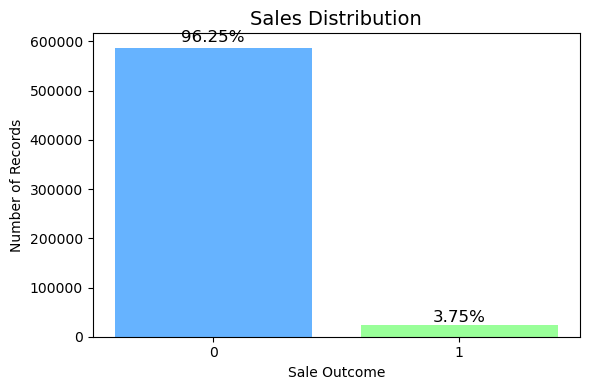

In [152]:
sales_counts = df['sale'].value_counts()
sales_perc = df['sale'].value_counts(normalize=True) * 100

plot_target(sales_counts=sales_counts, sales_perc=sales_perc)

### 2.7.2 Numerical variables distribution

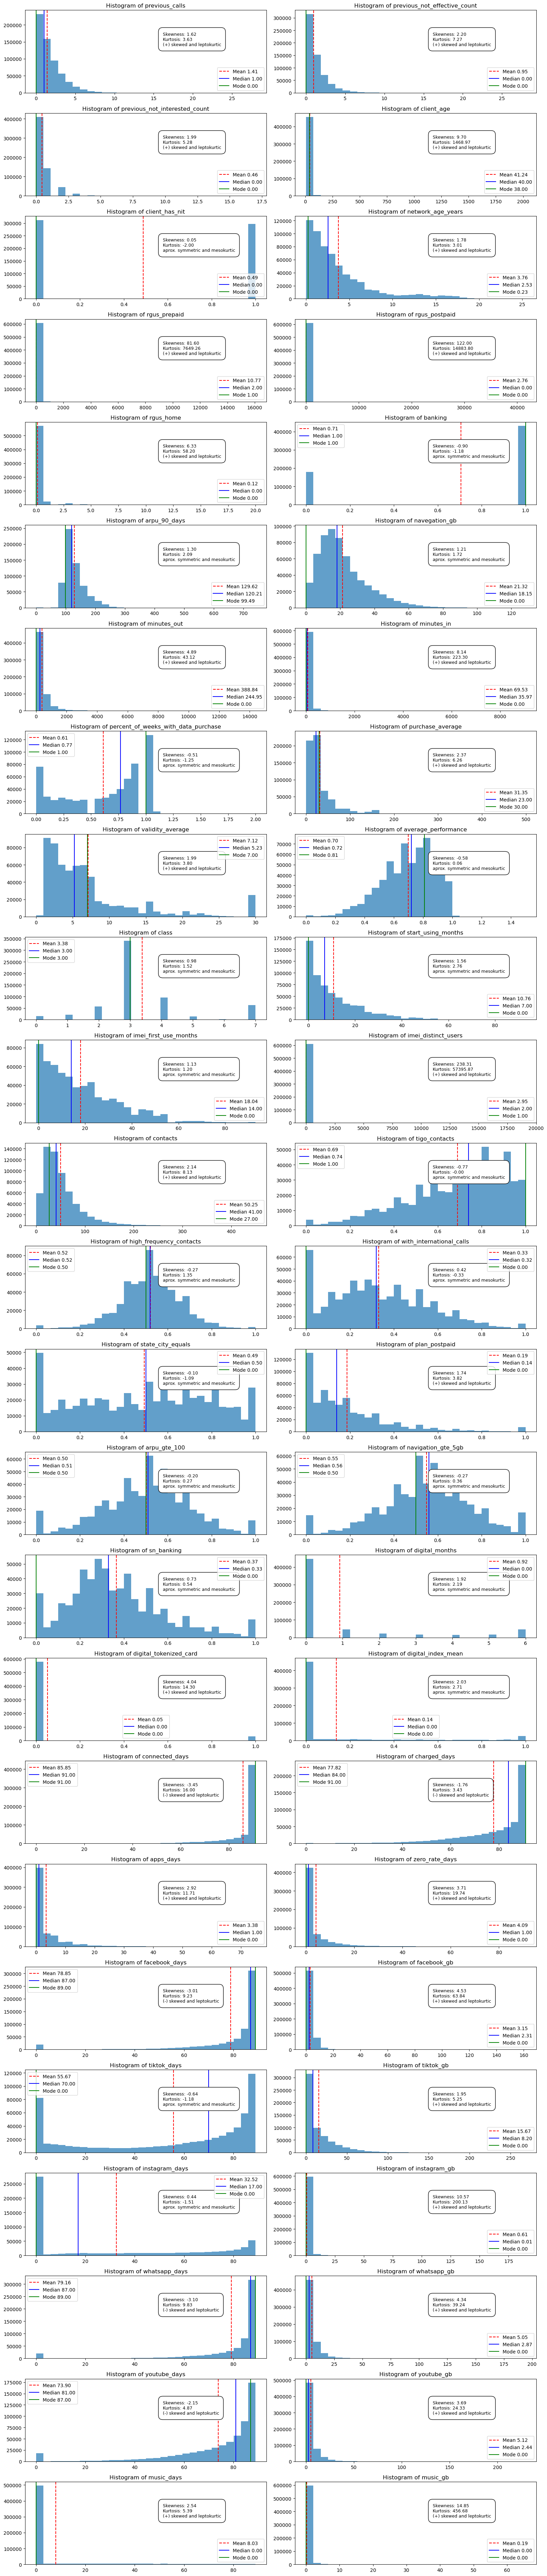

In [94]:
plot_histogram(df, numerical_variables)

### 2.7.3 Correlation

#### Global correlation

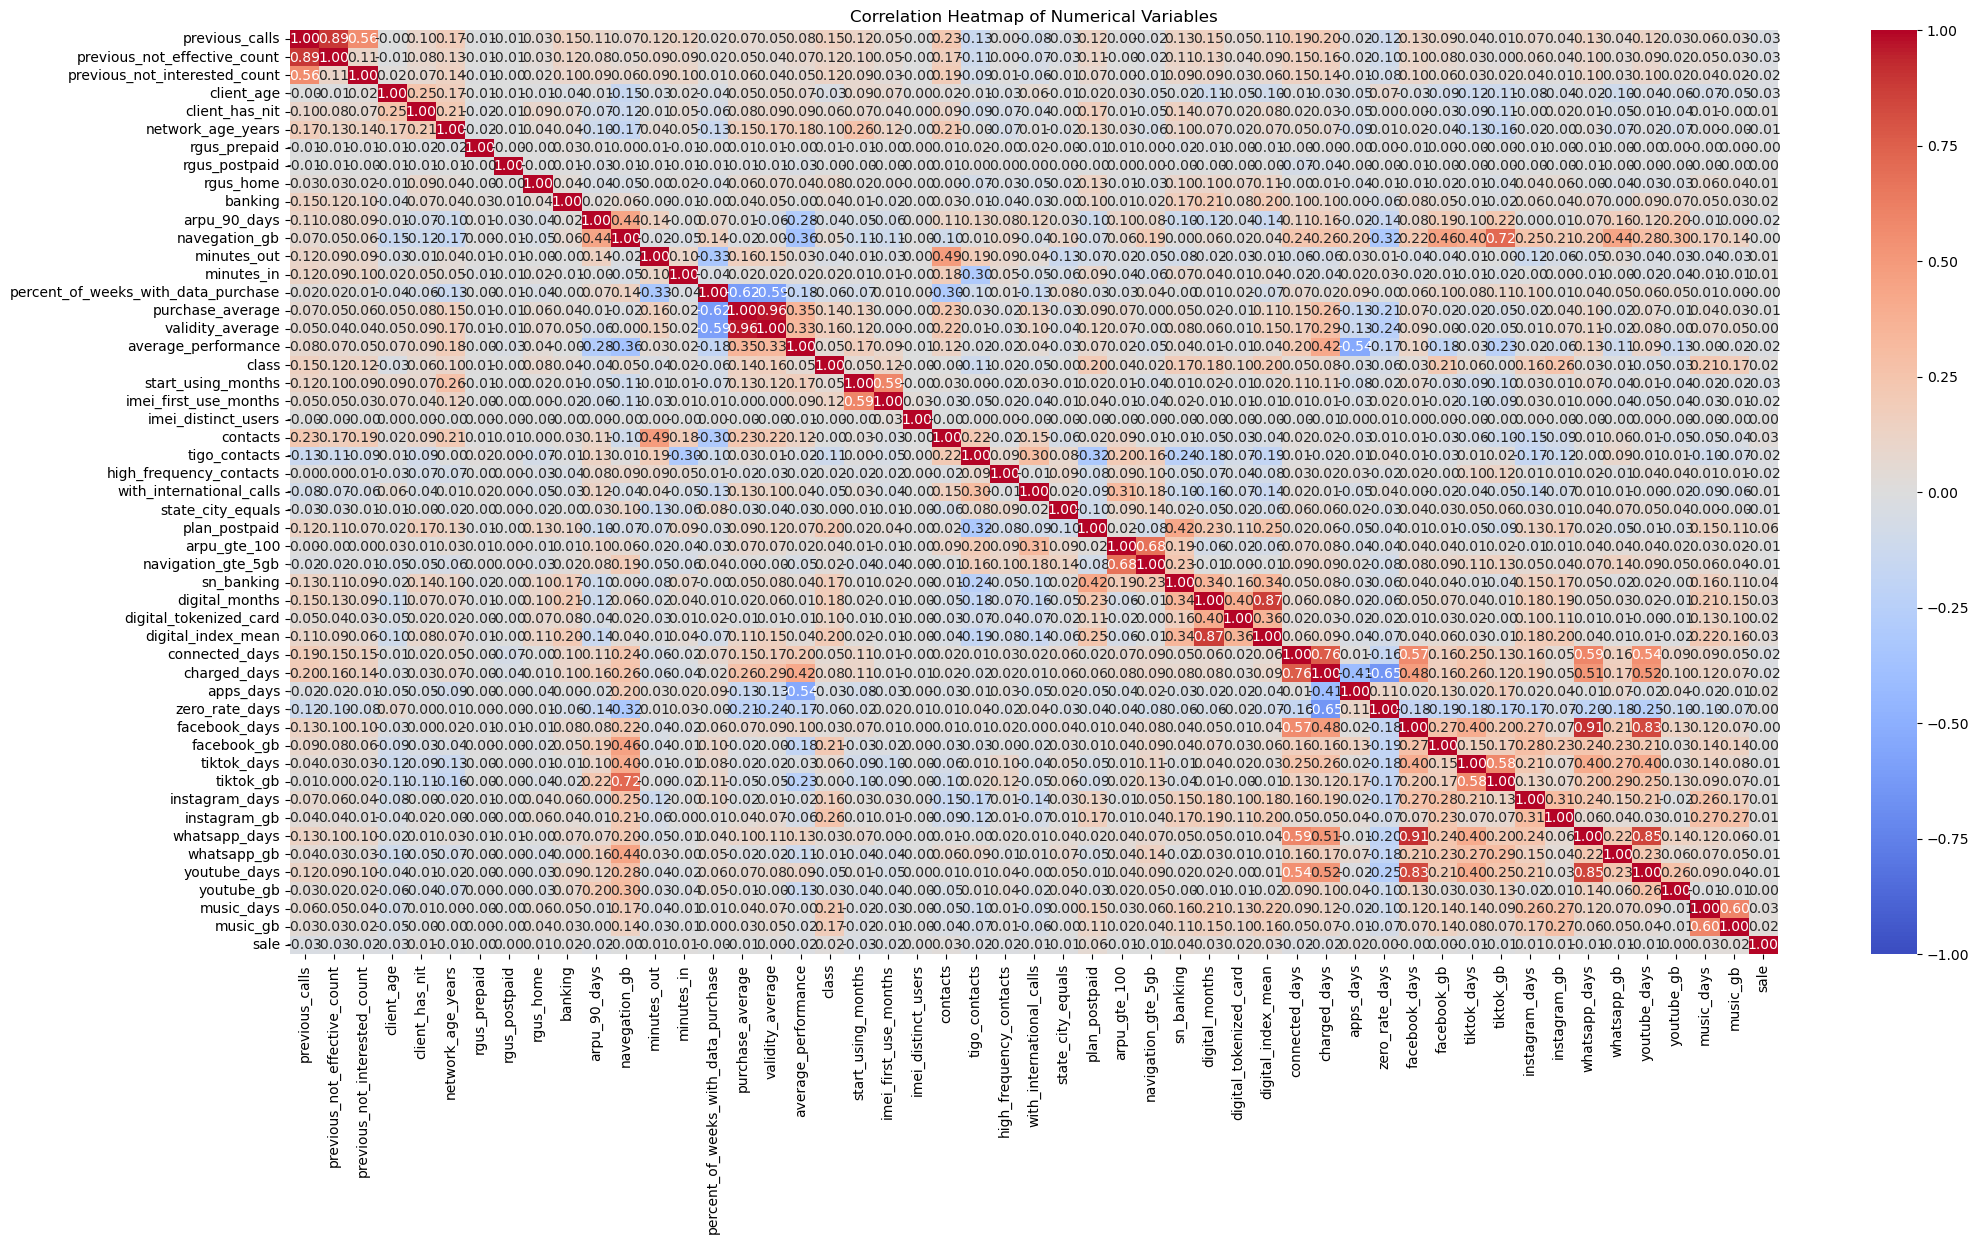

In [158]:
corr = df.corr(numeric_only=True)
plot_correlation(corr=corr, title="Correlation Heatmap of Numerical Variables")

#### Find highly correlated variables

In [156]:
corr_matrix = df.corr(numeric_only=True).abs()

# Upper triangle mask
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

threshold = 0.5
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
for var in to_drop:
    print("Highly correlated variables:", var)

Highly correlated variables: previous_not_effective_count
Highly correlated variables: previous_not_interested_count
Highly correlated variables: purchase_average
Highly correlated variables: validity_average
Highly correlated variables: imei_first_use_months
Highly correlated variables: navigation_gte_5gb
Highly correlated variables: digital_index_mean
Highly correlated variables: charged_days
Highly correlated variables: apps_days
Highly correlated variables: zero_rate_days
Highly correlated variables: facebook_days
Highly correlated variables: tiktok_gb
Highly correlated variables: whatsapp_days
Highly correlated variables: youtube_days
Highly correlated variables: music_gb


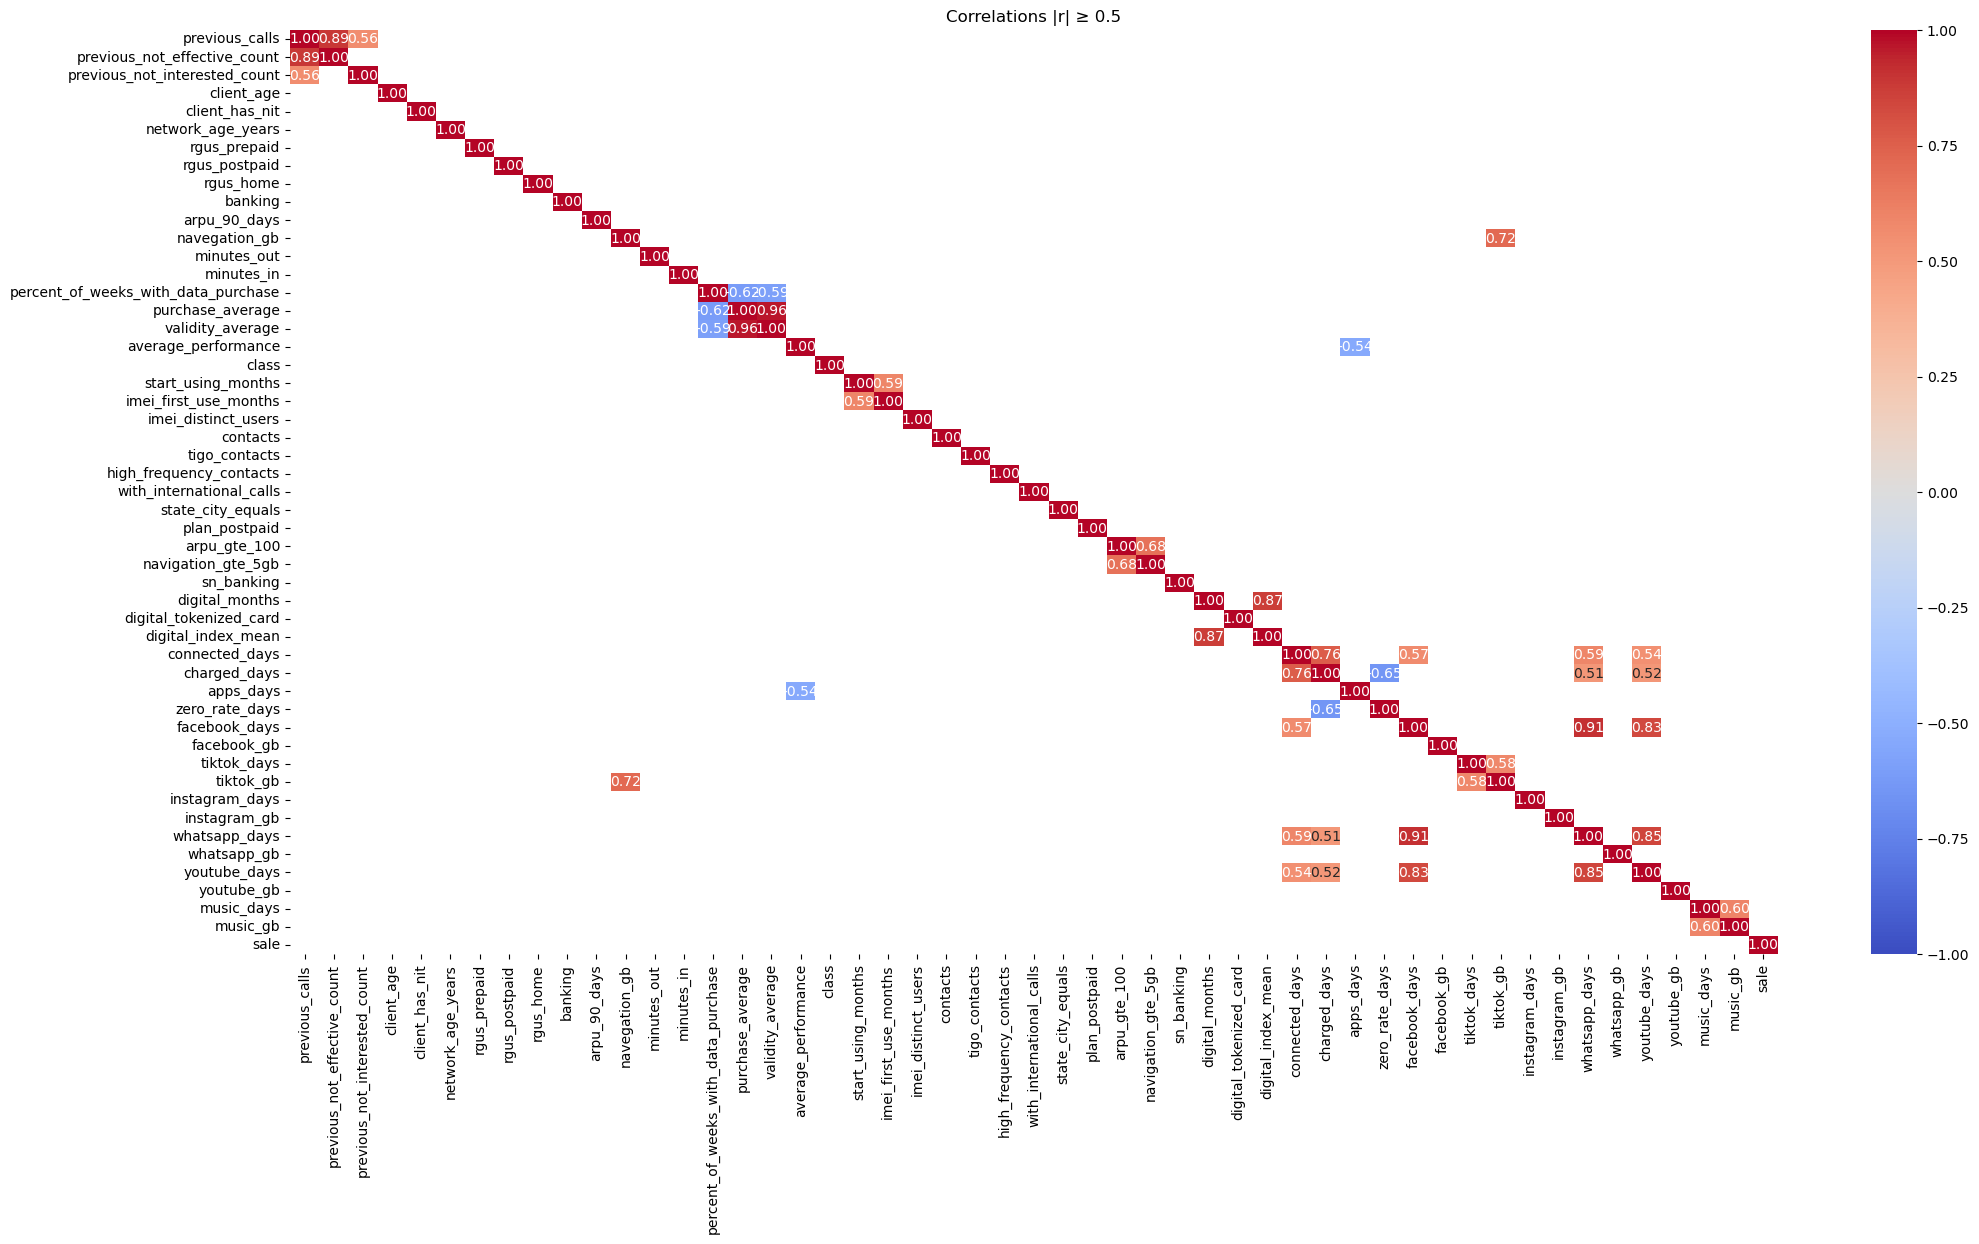

In [157]:
threshold = 0.5
mask = corr.abs() < threshold
filtered_corr = corr.mask(mask)
plot_correlation(filtered_corr, f"Correlations |r| ≥ {threshold}")

#### Correlation with target variable

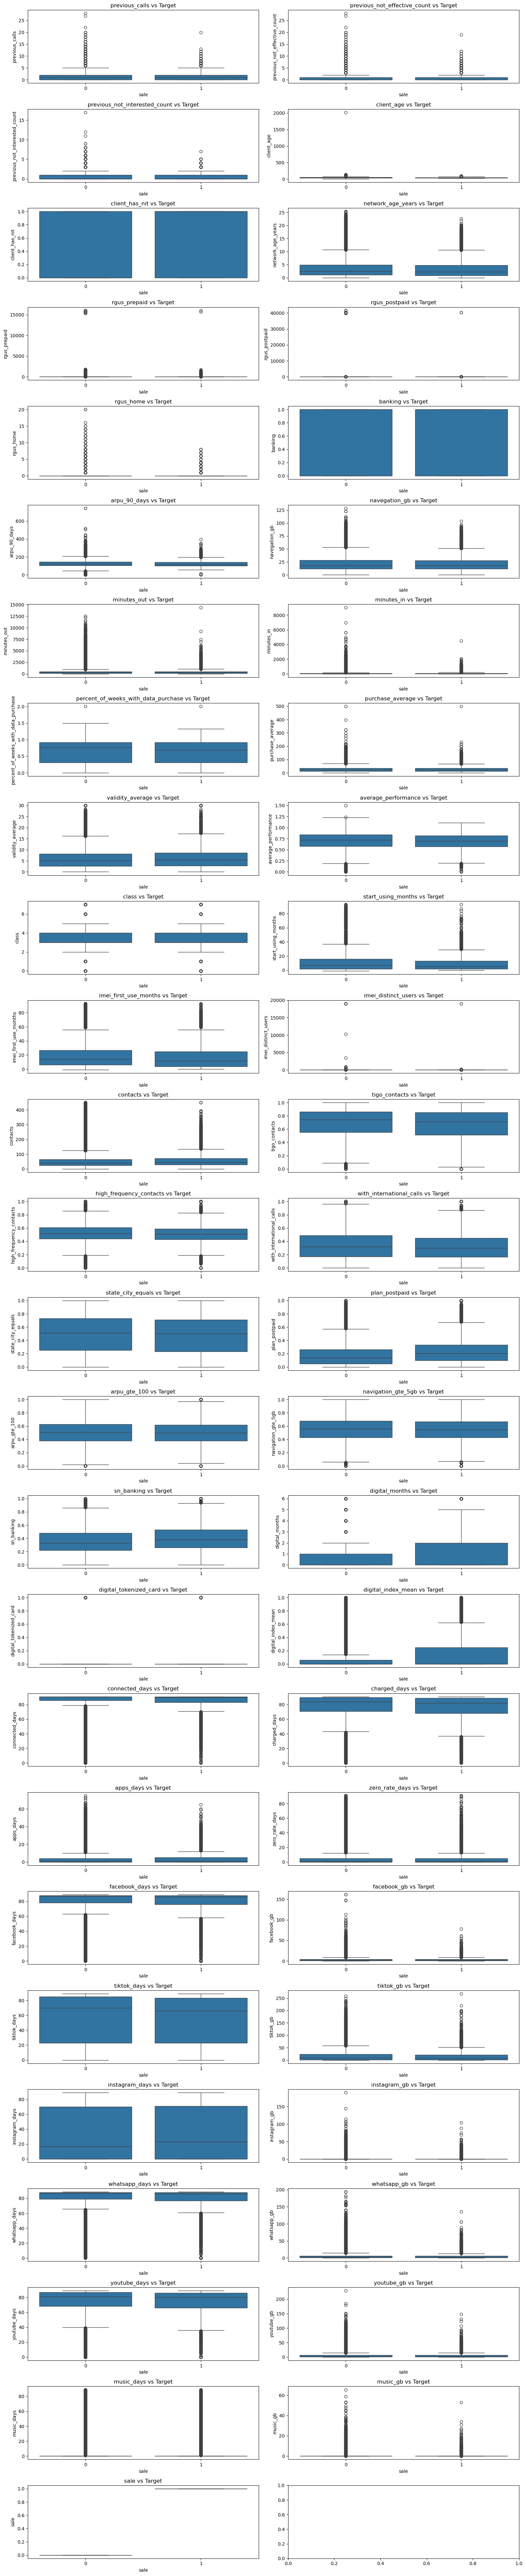

In [162]:
plotBoxplots(df=df, numerical_cols=numerical_variables, target='sale')

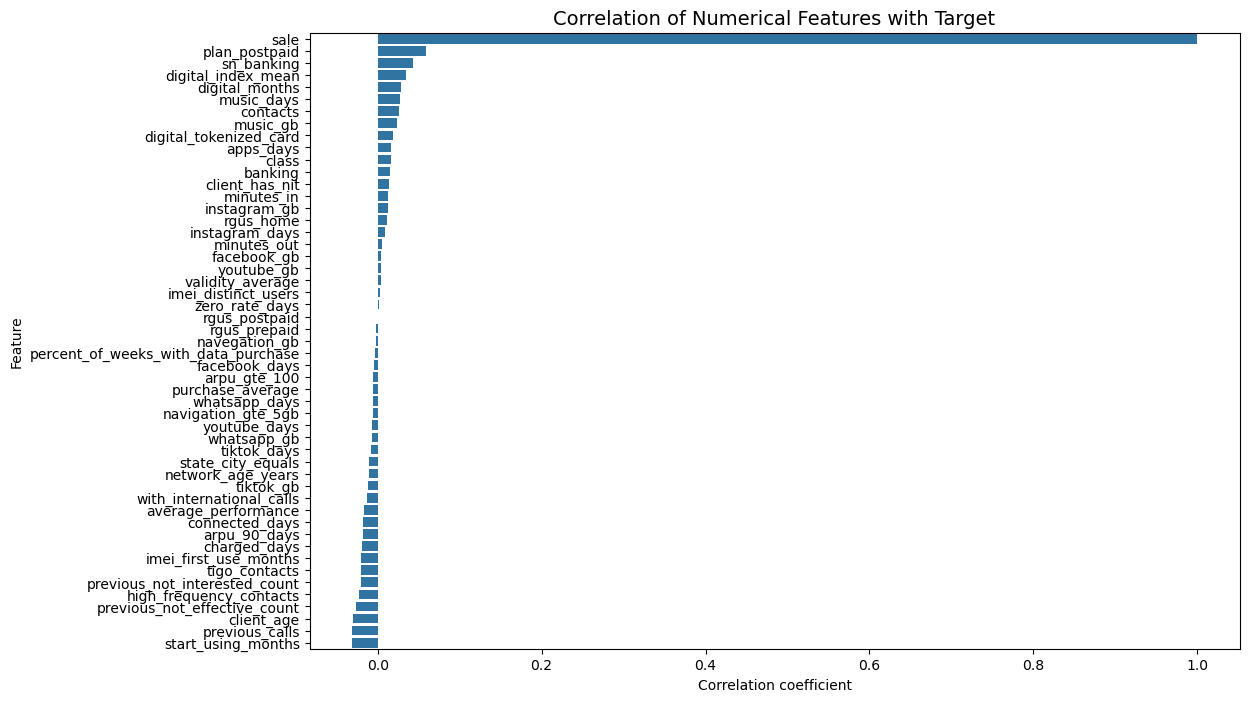

In [165]:
corr = df.corr(numeric_only=True)['sale'].sort_values(ascending=False)
correlation_barplot(corr)

The point-biserial correlation helps us understand how much a numeric feature is related to a yes/no outcome.

It measures the strength and direction of the relationship between:

a binary variable (e.g., sale = 0 or sale = 1), and

a continuous numeric variable (e.g., age, balance, duration, etc.).

If the people who bought (sale = 1) tend to have higher values (like longer calls or larger balances), the correlation will be positive.
If they tend to have lower values, it will be negative.
If it’s close to zero, that means this variable doesn’t really make a difference between buyers and non-buyers.

In [76]:
from scipy.stats import pointbiserialr
import numpy as np

target = 'sale'

# 1) Limpia inf/NaN
df_nan = df.replace([np.inf, -np.inf], np.nan)

# 2) Asegura que NO iteras sobre la target
numerical_variables = [c for c in numerical_variables if c != target]

corrs = {}

for col in numerical_variables:
    # Subconjunto limpio solo con col y target (sin duplicar target)
    clean = df_nan[[col, target]].dropna()

    # Garantiza vectores 1D
    y = clean[target].to_numpy().ravel()
    x = clean[col].to_numpy().ravel()

    # Evita columnas constantes
    if np.unique(x).size < 2:
        continue

    r, p = pointbiserialr(y, x)
    corrs[col] = r

corrs = pd.Series(corrs).sort_values(ascending=False)
print(corrs.head(10))

plan_postpaid             0.058497
sn_banking                0.043175
digital_index_mean        0.033938
digital_months            0.028369
music_days                0.027585
contacts                  0.026299
music_gb                  0.023779
digital_tokenized_card    0.018861
apps_days                 0.015868
class                     0.015703
dtype: float64


### 2.6.3 missing numerical values

In [65]:
missing = df[numerical_variables].isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent.round(2)
})

missing_df

Missing Values  Percentage
client_age                                   151524       24.84
imei_distinct_users                              19        0.00
imei_first_use_months                            19        0.00
start_using_months                               19        0.00
class                                            19        0.00
network_age_years                                 2        0.00
previous_calls                                    0        0.00
zero_rate_days                                    0        0.00
sn_banking                                        0        0.00
digital_months                                    0        0.00
digital_tokenized_card                            0        0.00
digital_index_mean                                0        0.00
connected_days                                    0        0.00
charged_days                                      0        0.00
apps_days                                         0        0.00
facebook_days                                     0        0.00
arpu_gte_100                                      0        0.00
facebook_gb                                       0        0.00
tiktok_days                                       0        0.00
tiktok_gb                                         0        0.00
instagram_days                                    0        0.00
instagram_gb                                      0        0.00
whatsapp_days                                     0        0.00
whatsapp_gb                                       0        0.00
youtube_days                                      0        0.00
youtube_gb                                        0        0.00
music_days                                        0        0.00
navigation_gte_5gb                                0        0.00
with_international_calls                          0        0.00
plan_postpaid                                     0        0.00
minutes_out                                       0        0.00
previous_not_interested_count                     0        0.00
client_has_nit                                    0        0.00
rgus_prepaid                                      0        0.00
rgus_postpaid                                     0        0.00
rgus_home                                         0        0.00
banking                                           0        0.00
arpu_90_days                                      0        0.00
navegation_gb                                     0        0.00
minutes_in                                        0        0.00
state_city_equals                                 0        0.00
percent_of_weeks_with_data_purchase               0        0.00
purchase_average                                  0        0.00
validity_average                                  0        0.00
average_performance                               0        0.00
contacts                                          0        0.00
tigo_contacts                                     0        0.00
high_frequency_contacts                           0        0.00
previous_not_effective_count                      0        0.00
music_gb                                          0        0.00

### 2.6.4 Outliers

Outlier detection helps identify data points that deviate significantly from other observations.

In this notebook, boxplots are used (see next cell) to visualize outliers for each numerical variable. In a boxplot, outliers are typically shown as points outside the "whiskers" (which represent 1.5 times the interquartile range from the quartiles).

These outliers may indicate errors, rare events, or variability in the data, and can impact model performance.

Detecting and handling outliers is important for robust data analysis and modeling.

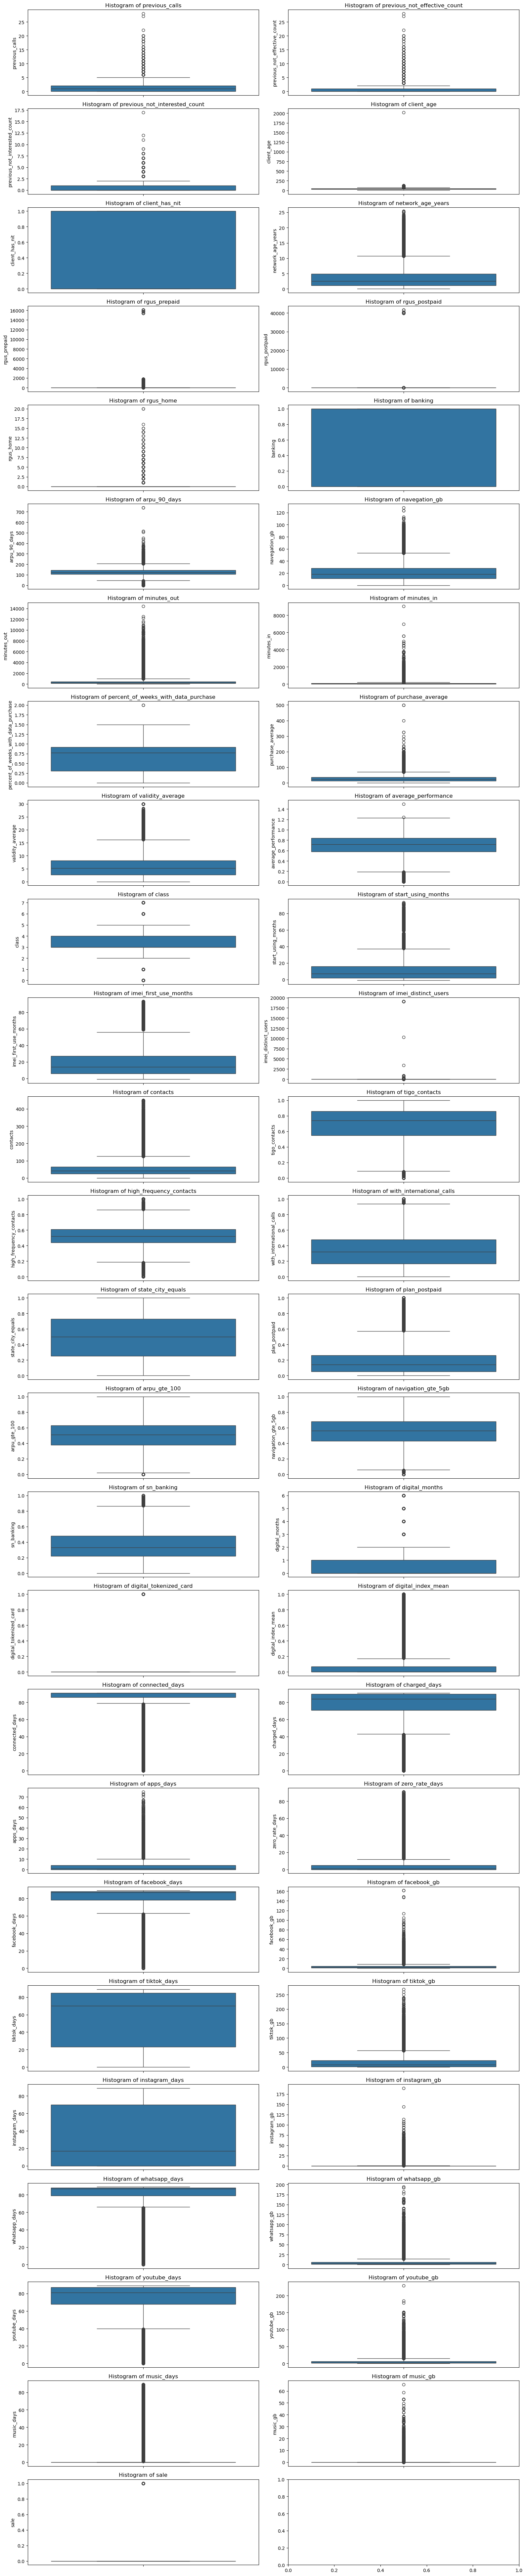

In [166]:
plotBoxplots(df, numerical_cols=numerical_variables, target='')

## 2.8 Categorical Variables

This dataset has 9 categorical variables

In [129]:
categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'categorical variables: {len(categorical_variables)}')

categorical variables: 9


The following tables describes the categorical variables in the dataset making emphasis in:
* Count
* Top
* Frequency

In [130]:
df.describe(include="object").T

count unique                    top    freq
state_name               610068     22              GUATEMALA  104875
previous_classification  610083      3             NEW CLIENT  231950
client_gender            458428      2                      M  247019
socioeconomic_level      610083      6                      D  227175
network_technology_code  610064      4                     4G  554284
operating_system         610064      9                ANDROID  564097
type_name                610064      4             SMARTPHONE  609528
brand_name               610064    128                SAMSUNG  358068
model_name               610064   2382  SAMSUNG A10S 2GB+32GB   41674

### 2.8.1 Cardinal values
the following instruction will show the cardinal values for categorical variables

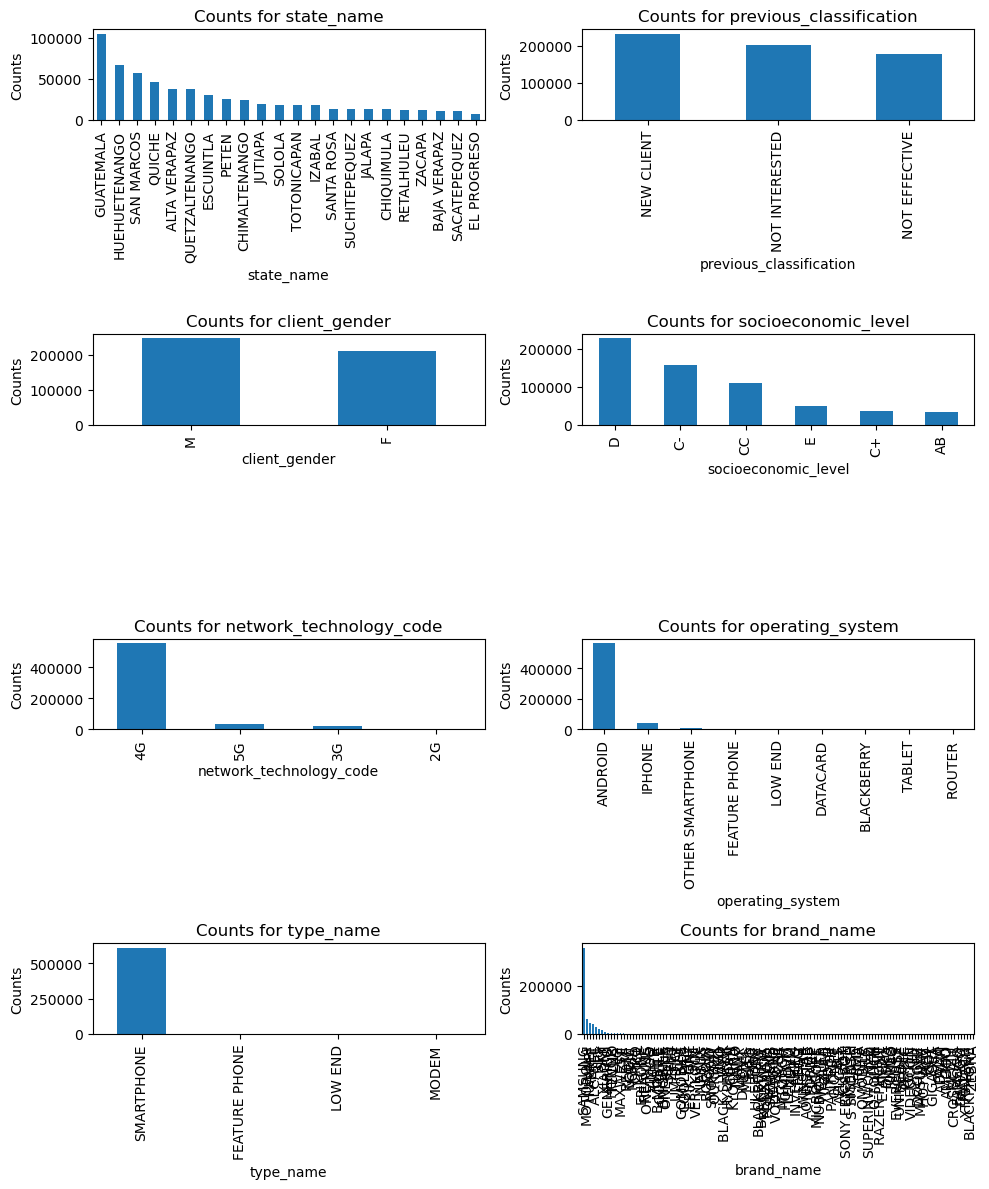

In [132]:
plot_bar(df=df, categorical_vars=categorical_variables)

### 2.8.2 Target distribution by category

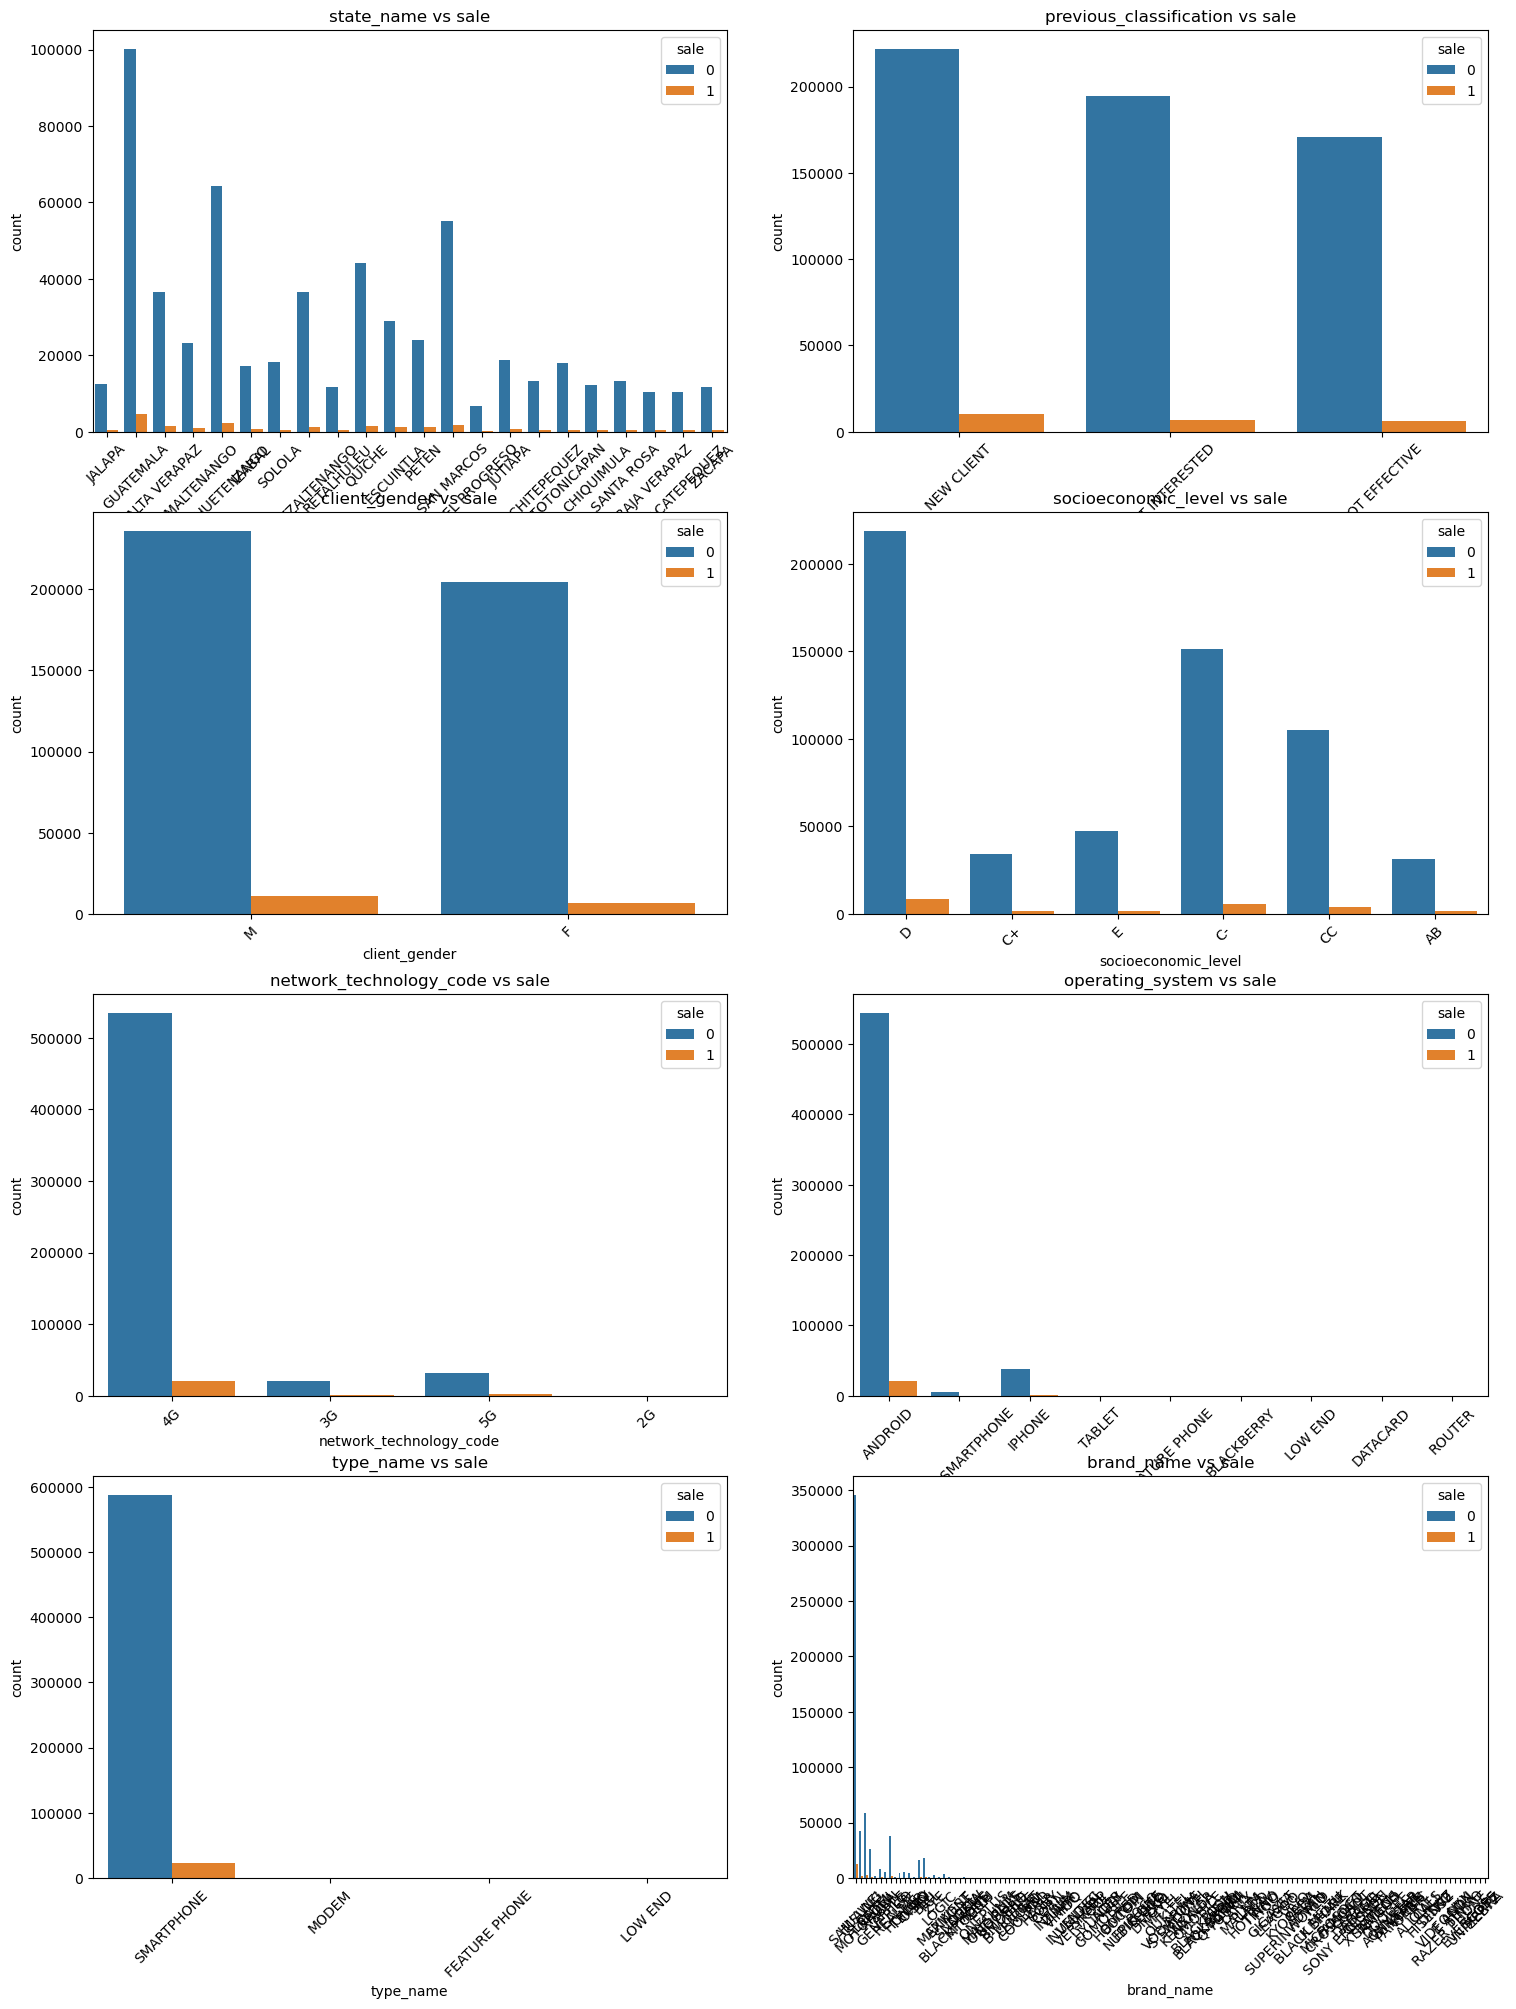

In [148]:
plot_bivariade_bar(df=df, categorical_vars=categorical_variables, target="sale")

### 2.8.3 explaining proportion of sales respectly categorical vars

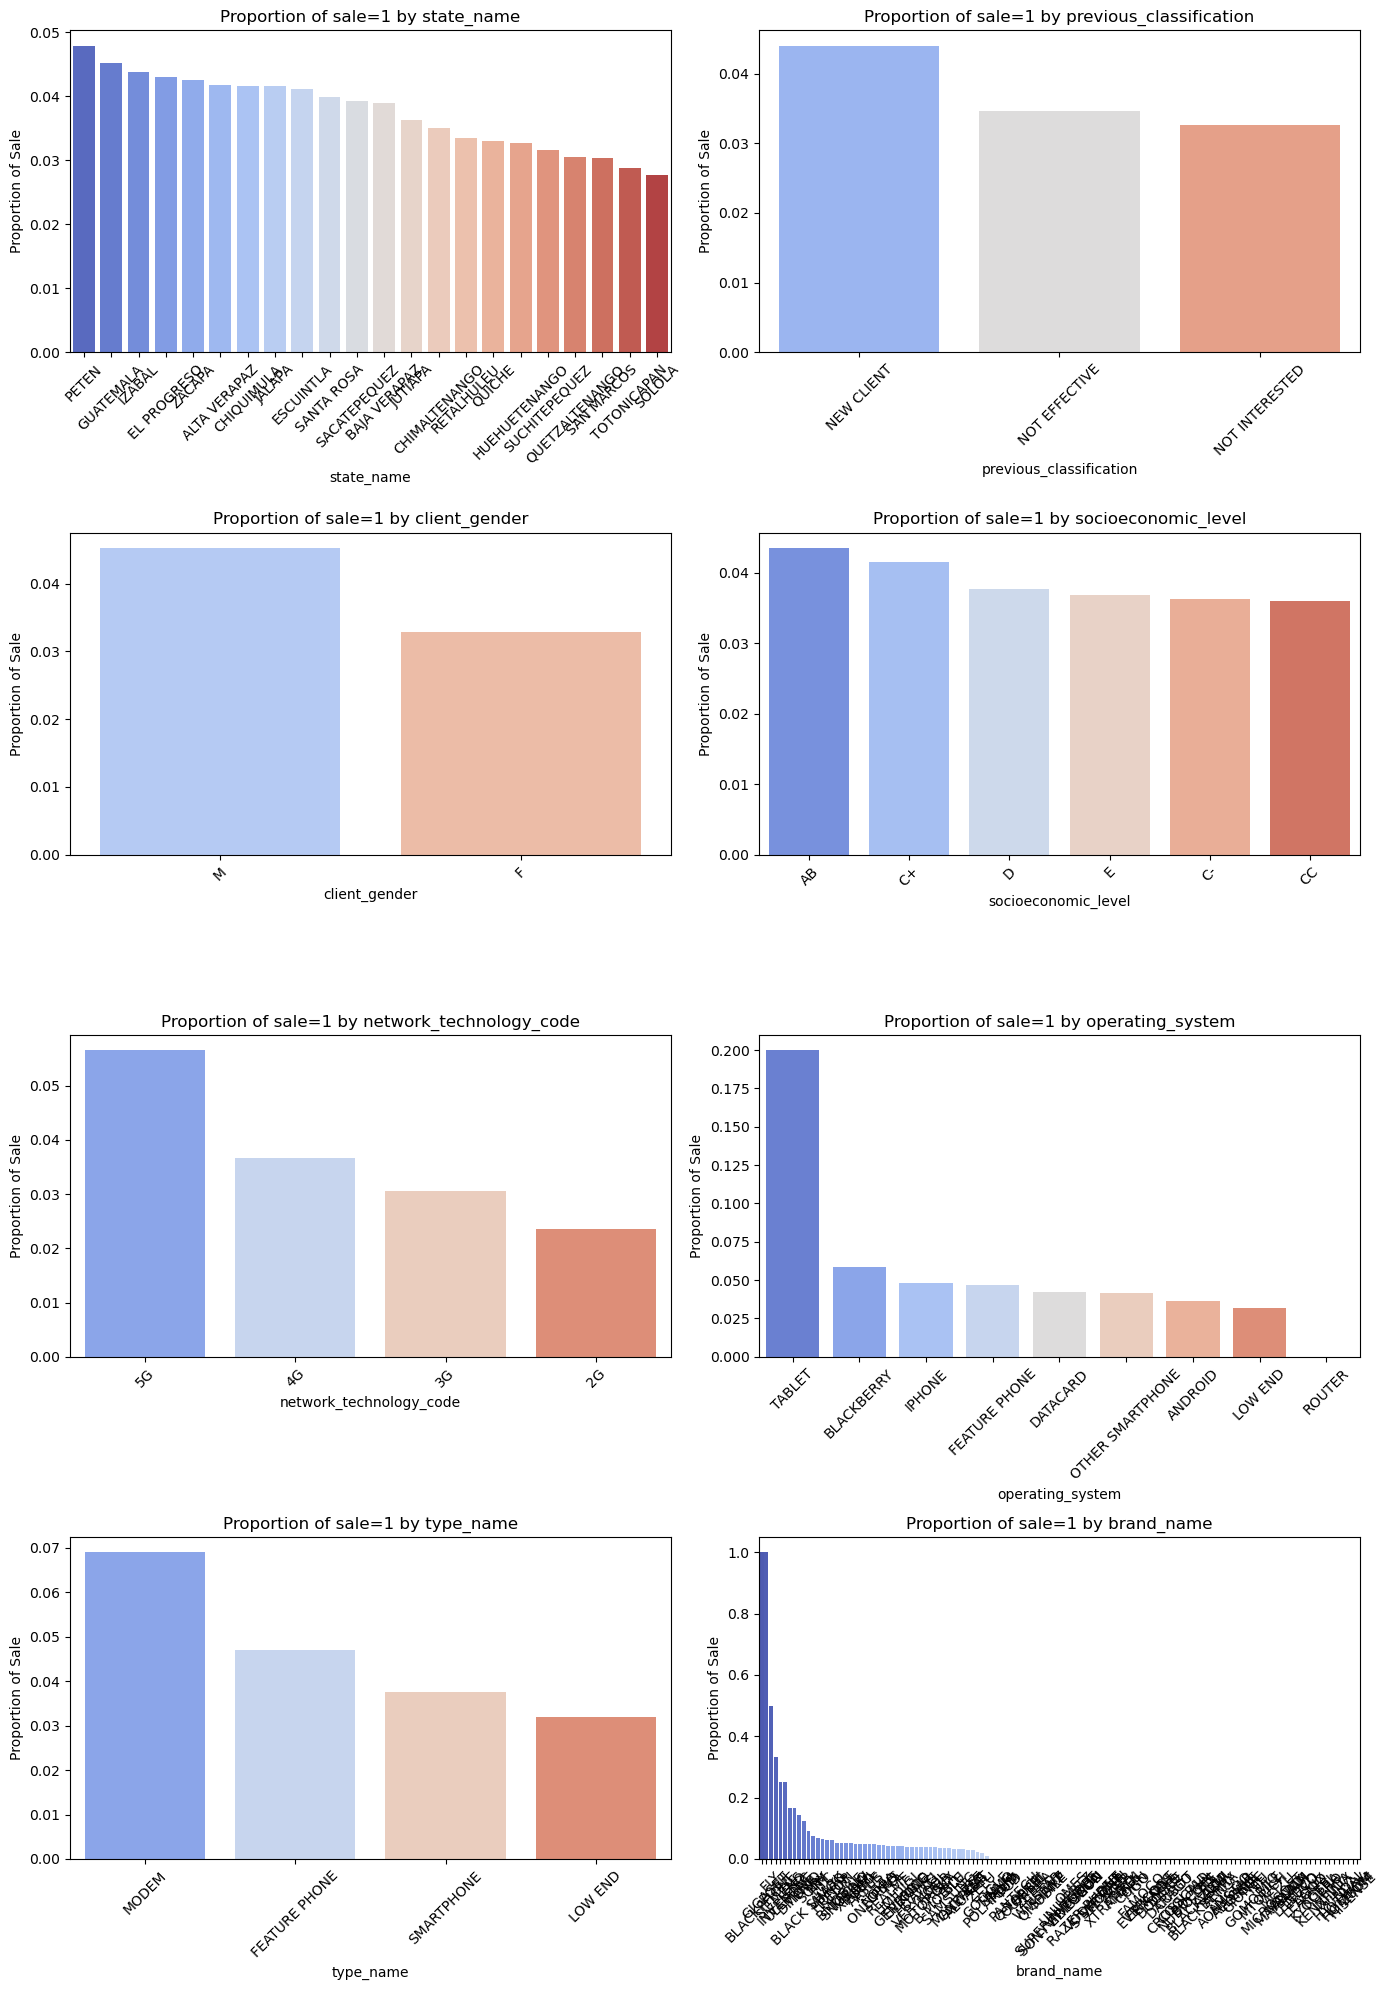

In [141]:
explain_targetWith_cat(df=df, categorical_vars=categorical_variables, target="sale")

### 2.8.4 Missing values

Identifying missing values in a dataset is a crucial step in the data preprocessing phase. Missing values can lead to inaccurate analyses, biased results, and errors in machine learning models. By detecting and handling missing data appropriately, we ensure the integrity and reliability of our subsequent data analysis and modeling processes.

In [149]:
missing = df[categorical_variables].isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent.round(2)
})

missing_df

Missing Values  Percentage
client_gender                    151655       24.86
network_technology_code              19        0.00
operating_system                     19        0.00
type_name                            19        0.00
brand_name                           19        0.00
model_name                           19        0.00
state_name                           15        0.00
previous_classification               0        0.00
socioeconomic_level                   0        0.00

## 2.9 Conclusions

*EDA*

Across all cuts the conversion rate is low (~3–5%), confirming **strong class imbalance**. Categorical signals are material: **previous_classification** is highly informative (NEW CLIENT highest, NOT INTERESTED lowest), **socioeconomic_level** shows a clear gradient (A/B, C+ > C/D/E), and **state_name** differences are present but secondary. **Technology and device** matter: 5G > 4G > 3G > 2G in sale proportion; **SMARTPHONE** dominates volume, while categories like **MODEM/TABLET/BLACKBERRY** can show high lift but with **small sample sizes**; **Android** concentrates most of the base. **brand_name** exhibits a long tail (high cardinality), requiring careful encoding.

Operationally, this suggests prioritizing campaigns toward segments with better **lift × volume** (NEW CLIENT, 4G/5G, higher socioeconomic tiers, smartphones) while tailoring scripts for low-propensity niches (NOT INTERESTED, 2G/3G). For modeling, expect **non-linear, multifactor effects**; use encodings aligned to cardinality (target vs one-hot), **rebalance classes**, and set the operating threshold via **precision/recall/F1** trade-offs. Finally, control for small-n volatility in niche device/OS buckets and keep explainability (e.g., **SHAP**) to translate scores into actionable reasons for telemarketing.
